# Meta learning and baseline comparison

In [56]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import lightgbm as ltb

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator, MetaEvaluator

## Macros

In [57]:
META_LABEL_METRIC = "kappa"
META_MODEL = "LGBMRegressor"
BASE_MODEL = "RandomForestClassifier"
DATASET = "electricity"

FILENAME = f"metamodel: {META_MODEL} - basemodel: {BASE_MODEL} - metric: {META_LABEL_METRIC} - dataset: {DATASET}"
FILENAME

'metamodel: LGBMRegressor - basemodel: RandomForestClassifier - metric: kappa - dataset: electricity'

In [58]:
META_LEARNING_COL = "meta_learning"
BASELINE_COL = "baseline"
TARGET_COL = "target"

## Read data

In [59]:
df = pd.read_csv(f"metabases/{FILENAME}.csv")
df = df.rename(columns={"predicted": META_LEARNING_COL, f"last_{META_LABEL_METRIC}": BASELINE_COL, META_LABEL_METRIC: TARGET_COL})
df = df[[TARGET_COL, META_LEARNING_COL, BASELINE_COL]].dropna()
df.head()

,target,meta_learning,baseline
97,0.637243,0.785465,0.070022
98,0.697824,0.746081,0.070022
99,0.818548,0.711716,0.070022
100,0.683973,0.688287,0.070022
101,0.480249,0.076361,0.070022


In [60]:
meta_eval = MetaEvaluator(
    baseline_col = "baseline",
    mtl_col = "meta_learning",
    target_col = "target",
    eta = 50,
    step = 5
)
meta_eval.fit(df)

Cumulative gain definition: mse(baseline) - mse(metalearning)


0.7540420771322044

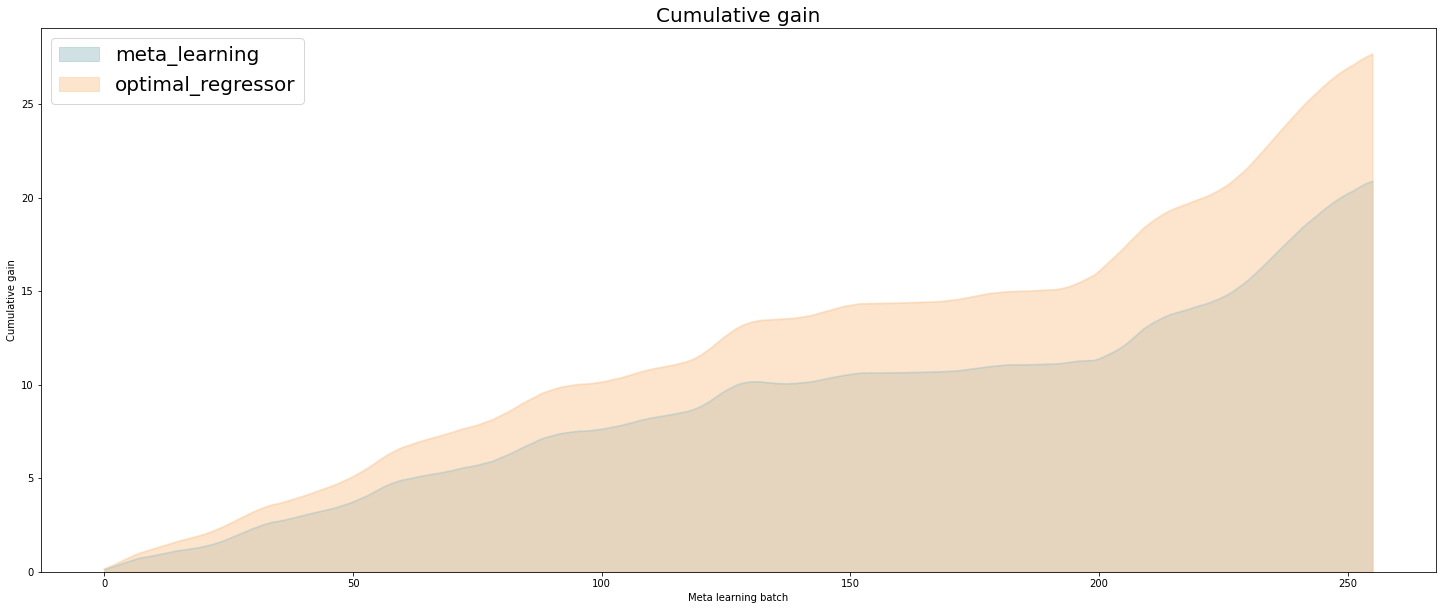

In [61]:
meta_eval.plot_cumulative_gain()

In [62]:
# meta_eval.plot_results()

In [63]:
with open(f"models/{FILENAME}.pickle", "rb") as f:
        model = pickle.load(f)
model

LGBMRegressor(max_depth=5, num_leaves=21, random_state=2022)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

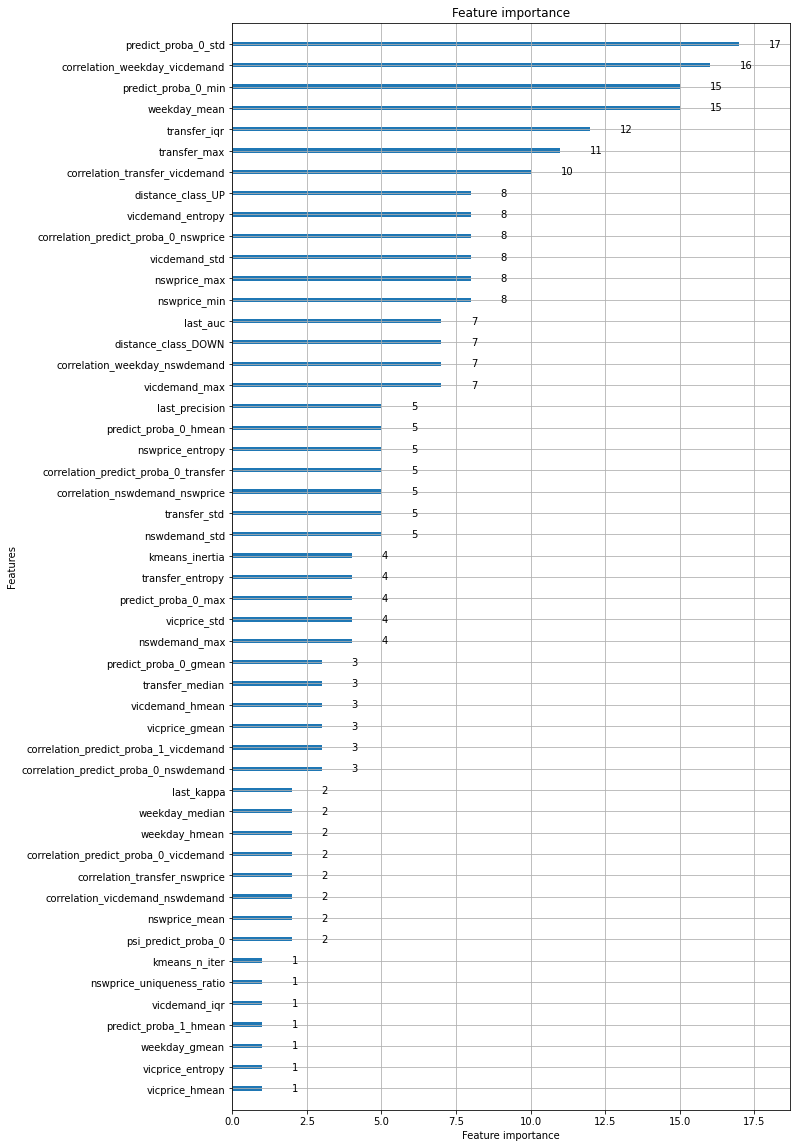

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 20))
ltb.plot_importance(model, max_num_features=50, ax=ax)